In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [3]:
# Load example data
full_wt_df = pd.read_csv('data/sortseq/full-wt/data.txt',delim_whitespace=True)
rnap_wt_df = pd.read_csv('data/sortseq/rnap-wt/data.txt',delim_whitespace=True)
crp_wt_df = pd.read_csv('data/sortseq/crp-wt/data.txt',delim_whitespace=True)

# # Separate test from data_df
# ix_test = data_df['set']=='test'
# test_df = data_df[ix_test].reset_index(drop=True)
# print(f'test N: {len(test_df):,}')

# # Remove test data from data_df
# data_df = data_df[~ix_test].reset_index(drop=True)
# print(f'training + validation N: {len(data_df):,}')


In [4]:
data_df = full_wt_df.merge(rnap_wt_df,on='seq',how='outer').merge(crp_wt_df,on='seq',how='outer').fillna(0)

In [5]:
y_cols = list(np.arange(0,30,1).astype(str))
cols = list(np.arange(0,30,1).astype(str))
cols.insert(0,'x')
data_df.columns = cols

In [6]:
X = data_df['x']
y = data_df[y_cols]

In [7]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# from mavenn.src.layers.gpmap import GPMapLayer


# # Tensorflow imports
# import tensorflow as tf
# import tensorflow.keras.backend as K
# from tensorflow.keras.initializers import Constant
# from tensorflow.keras.layers import Layer, Dense

# class ThermodynamicLayer(GPMapLayer):
#     """Represents an thermodynamic model of transcription
#        regulation in E. Coli at the xylE promoter, which 
#        contains binding sites for RNAP, CRP, and xylR.
#     """

#     def __init__(self, 
#                  CRP_start,
#                  CRP_end,
#                  xylR_start,
#                  xylR_end,
#                  RNAP_start,
#                  RNAP_end,
#                  regularizer, 
#                  *args, **kwargs):
#         """Construct layer instance."""
        
#         # set attributes
#         self.CRP_start = CRP_start
#         self.CRP_end = CRP_end        

#         self.xylR_start = xylR_start
#         self.xylR_end = xylR_end                        
        
#         self.RNAP_start = RNAP_start
#         self.RNAP_end = RNAP_end        
        
#         #self.C=kwargs['C']
#         self.C=4
#         self.regularizer = tf.keras.regularizers.L2(regularizer)
        
#         # form helpful variables
#         self.L_CRP = CRP_end-CRP_start
#         self.L_RNAP = RNAP_end - RNAP_start
#         self.L_xylR = xylR_end - xylR_start
        
#         super().__init__(*args, **kwargs)

#     def build(self, input_shape):
#         """Build layer."""
        
#         #1 define bias/chemical potential weight for crp
#         self.mu_CRP = self.add_weight(name='mu_CRP',
#                                        shape=(1,),
#                                        initializer=Constant(0.),
#                                        trainable=True,
#                                        regularizer=self.regularizer)
        
        
#         #2 define bias/chemical potential weight for xylR
#         self.mu_xylR = self.add_weight(name='mu_xylR',
#                                        shape=(1,),
#                                        initializer=Constant(0.),
#                                        trainable=True,
#                                        regularizer=self.regularizer)                   

#         #3 define bias/chemical potential weight for rnap
#         self.mu_RNAP = self.add_weight(name='mu_RNAP',
#                                        shape=(1,),
#                                        initializer=Constant(0.),
#                                        trainable=True,
#                                        regularizer=self.regularizer)
     
        

#         #4 Define theta_CRP_lc parameters
#         theta_CRP_lc_shape = (1, self.L_CRP, self.C)

#         #theta_CRP_lc_init = np.random.randn(*theta_CRP_lc_shape)/np.sqrt(self.L_CRP)
#         self.theta_CRP_lc = self.add_weight(name='theta_CRP_lc',
#                                         shape=theta_CRP_lc_shape,
#                                         #initializer=Constant(CRP_init_values),
#                                         trainable=True,
#                                         regularizer=self.regularizer)

                
#         #5 Define theta_xylR_lc parameters
#         theta_xylR_lc_shape = (1, self.L_xylR, self.C)

#         #theta_xylR_lc_init = np.random.randn(*theta_xylR_lc_shape)/np.sqrt(self.L_xylR)
#         self.theta_xylR_lc = self.add_weight(name='theta_xylR_lc',
#                                         shape=theta_xylR_lc_shape,
#                                         #initializer=Constant(xylR_init_values),
#                                         trainable=True,
#                                         regularizer=self.regularizer)        
        
#         #6 Define theta_rnap_lc parameters
#         theta_RNAP_lc_shape = (1, self.L_RNAP, self.C)

#         #theta_RNAP_lc_init = np.random.randn(*theta_RNAP_lc_shape)/np.sqrt(self.L_RNAP)
#         self.theta_RNAP_lc = self.add_weight(name='theta_RNAP_lc',
#                                         shape=theta_RNAP_lc_shape,
#                                         #initializer=Constant(RNAP_init_values),
#                                         trainable=True,
#                                         regularizer=self.regularizer)

        
#         #7 define interaction term between CRP and xylR
#         self.I_cx = self.add_weight(name='I_cx',
#                                shape=(1,),
#                                initializer=Constant(-1),
#                                trainable=True)
        
#         #8 define interaction term between RNAP and xylR. 
#         self.I_rx = self.add_weight(name='I_rx',
#                                shape=(1,),
#                                initializer=Constant(-1),
#                                trainable=True,
#                                regularizer=self.regularizer)
        
# #         #9 define interaction term between CRP and RNAP
# #         self.I_cr = self.add_weight(name='I_cr',
# #                                shape=(1,),
# #                                initializer=Constant(-1),
# #                                trainable=True)        
        
# #         #10 define tsat term. 
#         self.tsat = self.add_weight(name='tsat',
#                                shape=(1,),
#                                initializer=Constant(1.),
#                                trainable=False)        
        
#         # Call superclass build
#         super().build(input_shape)

#     def call(self, x_lc):
#         """Process layer input and return output.
        
#         x_lc: (tensor)
#             Input tensor that represents one-hot encoded 
#             sequence values. 
#         """
        
#         # extract locations of binding sites from entire lac-promoter sequence.
#         x_CRP_lc = x_lc[:,self.C * self.CRP_start:self.C * self.CRP_end]
#         x_xylR_lc = x_lc[:,self.C * self.xylR_start: self.C * self.xylR_end]
#         x_RNAP_lc = x_lc[:,self.C * self.RNAP_start: self.C * self.RNAP_end]
        
#         # reshape according to crp and rnap lengths. 
#         x_CRP_lc = tf.reshape(x_CRP_lc, [-1, self.L_CRP, self.C])
#         x_xylR_lc = tf.reshape(x_xylR_lc, [-1, self.L_xylR, self.C])        
#         x_RNAP_lc = tf.reshape(x_RNAP_lc, [-1, self.L_RNAP, self.C])

                
#         # compute delta G for crp    
#         phi_CRP = self.mu_CRP + \
#               tf.reshape(K.sum(self.theta_CRP_lc * x_CRP_lc, axis=[1, 2]),
#                          shape=[-1, 1])
            
#         # compute delta G for LacI
#         phi_xylR = self.mu_xylR + \
#               tf.reshape(K.sum(self.theta_xylR_lc * x_xylR_lc, axis=[1, 2]),
#                          shape=[-1, 1])                             
            
#         # compute delta G for rnap
#         phi_RNAP = self.mu_RNAP + \
#               tf.reshape(K.sum(self.theta_RNAP_lc * x_RNAP_lc, axis=[1, 2]),
#                          shape=[-1, 1])                   
        
#         # partition function
#         Z = (1+K.exp(-phi_CRP)+K.exp(-phi_xylR)+ \
#              K.exp(-phi_RNAP)+ \
#              K.exp(-phi_xylR-phi_RNAP-self.I_rx)+ \
#              #K.exp(-phi_CRP-phi_RNAP-self.I_cr)+ \
#              K.exp(-phi_CRP-phi_RNAP)+ \
#              K.exp(-phi_CRP-phi_xylR-phi_RNAP-self.I_cx-self.I_rx) +\
#              K.exp(-phi_CRP-phi_xylR-self.I_cx)
#             )
        
#         transcription_states =  K.exp(-phi_RNAP)+ \
#                                 K.exp(-phi_xylR-phi_RNAP-self.I_rx)+ \
#                                 K.exp(-phi_CRP-phi_RNAP)+ \
#                                 K.exp(-phi_CRP-phi_xylR-phi_RNAP-self.I_cx-self.I_rx)
        
        
        
#         # compute rate of transcription
#         t = (self.tsat)*(transcription_states)/Z
        
        
#         # return rate of transcription
#         return t

In [9]:
# set positional argumnets for gpmap function
L = len(data_df['x'][0])
alphabet=['A','C','G','T']

#y_cols = data_df.columns[1:-1]
Y = len(y_cols)
print(f'L={L}, Y={Y}')

# get test set data.

L=75, Y=30


In [10]:
# instantiate gpmap object
gpmap = mavenn.gpmap.AdditiveGPMapLayer(L, alphabet)

#therodynamic_gpmap = ThermodynamicLayer(alphabet=alphabet,**gpmap_kwargs)

2022-04-15 14:08:03.282655: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
# I think this shouldn't require any positional arguments.
# mp_GE = mavenn.measurement_process_layers.GlobalEpistasisLayer(K=50,
#                                                                eta=1e-5,
#                                                                monotonic=True)
mp_mpa_1 = mavenn.measurement_process_layers.DiscreteAgnosticMP(info_for_layers_dict={'H_y_norm':0},
                                                                      Y=10,
                                                                      K=50,
                                                                      eta=1e-5,)

mp_mpa_2 = mavenn.measurement_process_layers.DiscreteAgnosticMP(info_for_layers_dict={'H_y_norm':0},
                                                                      Y=10,
                                                                      K=50,
                                                                      eta=1e-5,)

mp_mpa_3 = mavenn.measurement_process_layers.DiscreteAgnosticMP(info_for_layers_dict={'H_y_norm':0},
                                                                      Y=10,
                                                                      K=50,
                                                                      eta=1e-5,)


In [12]:
model = mavenn.Model2(gpmap=gpmap,
                      mp_list=[mp_mpa_1, mp_mpa_2, mp_mpa_3])

In [13]:
model.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Sequence_labels_input (InputLa  [(None, 330)]       0           []                               
 yer)                                                                                             
                                                                                                  
 Sequence_only (Lambda)         (None, 300)          0           ['Sequence_labels_input[0][0]']  
                                                                                                  
 additive_gp_map_layer (Additiv  (None, 1)           301         ['Sequence_only[0][0]']          
 eGPMapLayer)                                                                                     
                                                                                              

In [14]:
#x_train,y_train
y_train[y_cols[0:10]]

,0,1,2,3,4,5,6,7,8,9
60067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36079,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
93775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29346,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
43727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
# Set training data
model.set_data(x=x_train,
               y_list=[y_train[y_cols[0:10]].values,y_train[y_cols[10:20]].values,y_train[y_cols[20:30]].values],
               #validation_flags=(data_df['set']=='validation'),
               shuffle=False)

N = 111,432 observations set as training data.
Using 20.1% for validation.
Time to set data: 3.12 sec.


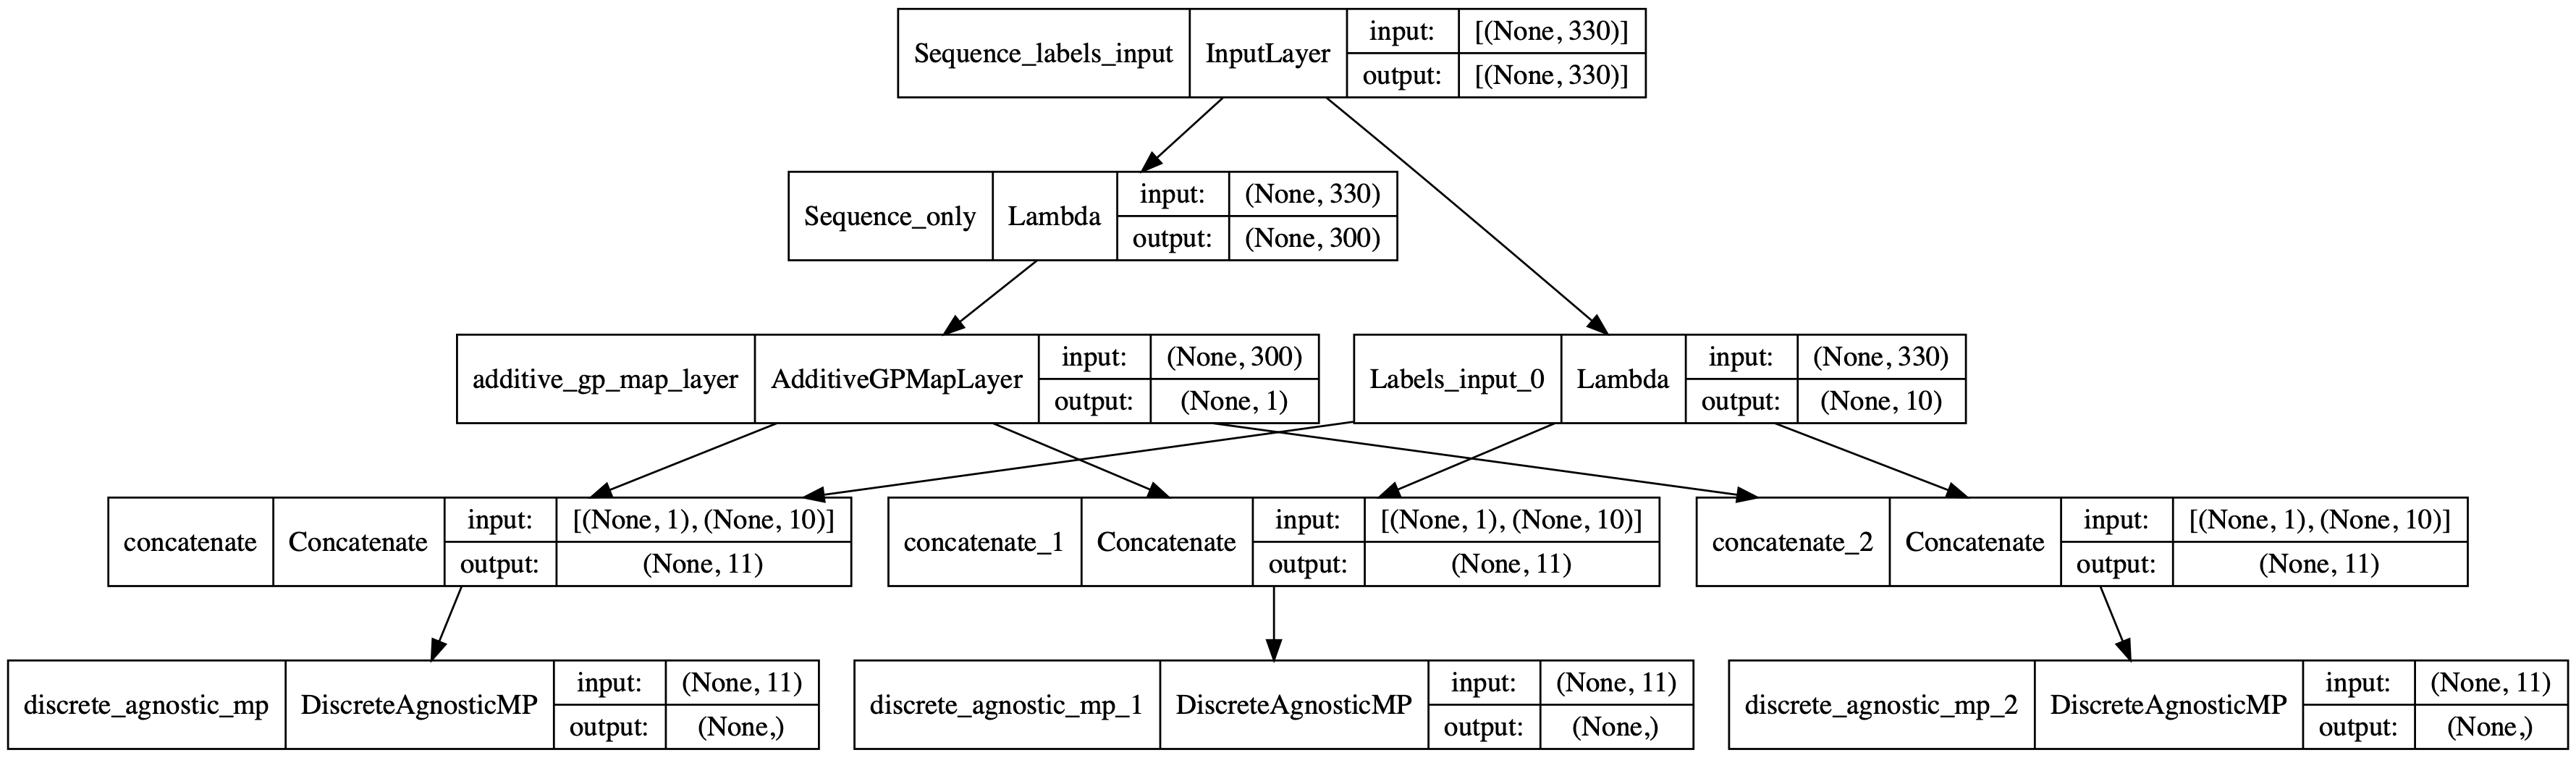

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=True,show_dtype=False,dpi=200)

In [20]:

# Fit model to data
model.fit(learning_rate=.005,
          epochs=50,
          batch_size=1000,
          try_tqdm = False,
          early_stopping=True,
          early_stopping_patience=10,
          linear_initialization=False)

Epoch 1/50
89/89 [==============================] - 4s 19ms/step - loss: 3331.4355 - discrete_agnostic_mp_loss: 1110.4830 - discrete_agnostic_mp_1_loss: 1110.5822 - discrete_agnostic_mp_2_loss: 1110.3483 - I_var: 0.0236 - val_loss: 3124.8574 - val_discrete_agnostic_mp_loss: 1041.5730 - val_discrete_agnostic_mp_1_loss: 1041.7030 - val_discrete_agnostic_mp_2_loss: 1041.5598 - val_I_var: 0.2088
Epoch 2/50
89/89 [==============================] - 1s 17ms/step - loss: 2904.7529 - discrete_agnostic_mp_loss: 968.1502 - discrete_agnostic_mp_1_loss: 968.3080 - discrete_agnostic_mp_2_loss: 968.2682 - I_var: 0.4447 - val_loss: 2830.3391 - val_discrete_agnostic_mp_loss: 943.3491 - val_discrete_agnostic_mp_1_loss: 943.3173 - val_discrete_agnostic_mp_2_loss: 943.6424 - val_I_var: 0.5000
Epoch 3/50
89/89 [==============================] - 1s 17ms/step - loss: 2809.1973 - discrete_agnostic_mp_loss: 936.2621 - discrete_agnostic_mp_1_loss: 936.3060 - discrete_agnostic_mp_2_loss: 936.5961 - I_var: 0.5385

89/89 [==============================] - 1s 15ms/step - loss: 2707.2800 - discrete_agnostic_mp_loss: 902.4105 - discrete_agnostic_mp_1_loss: 902.4674 - discrete_agnostic_mp_2_loss: 902.3227 - I_var: 0.6400 - val_loss: 2711.0806 - val_discrete_agnostic_mp_loss: 903.6151 - val_discrete_agnostic_mp_1_loss: 903.8259 - val_discrete_agnostic_mp_2_loss: 903.5596 - val_I_var: 0.6172
Epoch 23/50
89/89 [==============================] - 1s 15ms/step - loss: 2709.4231 - discrete_agnostic_mp_loss: 903.1318 - discrete_agnostic_mp_1_loss: 903.1398 - discrete_agnostic_mp_2_loss: 903.0717 - I_var: 0.6379 - val_loss: 2709.3979 - val_discrete_agnostic_mp_loss: 903.0885 - val_discrete_agnostic_mp_1_loss: 903.1069 - val_discrete_agnostic_mp_2_loss: 903.1222 - val_I_var: 0.6208
Epoch 24/50
89/89 [==============================] - 1s 14ms/step - loss: 2712.2095 - discrete_agnostic_mp_loss: 904.1154 - discrete_agnostic_mp_1_loss: 904.0369 - discrete_agnostic_mp_2_loss: 903.9764 - I_var: 0.6350 - val_loss: 27

On test data:


Text(0.5, 1.0, 'training hisotry')

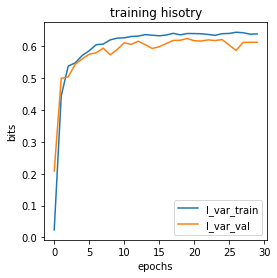

In [21]:
# Show training history
print('On test data:')
# x_test = test_df['x'].values
# y_test = test_df[y_cols].values


I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')

In [22]:
phi = gpmap.x_to_phi(x_test)

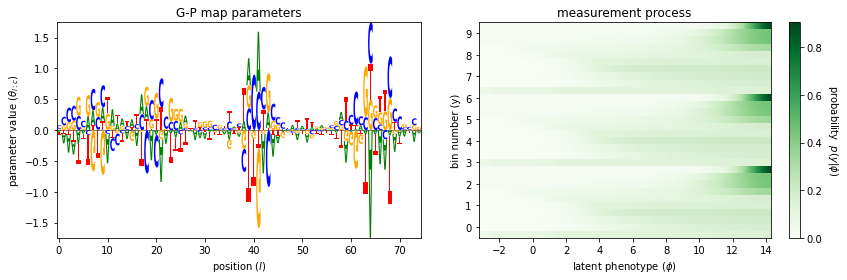

In [23]:
# Get G-P map parameters in matrix form
theta = np.squeeze(gpmap.weights[1].numpy())

# Create grid in phi space
#phi_lim = [-5, 3]
phi_lim = [min(phi), max(phi)]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = 10    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values
measurement_process_1 = mp_mpa_1.p_of_all_y_given_phi(phi).numpy()
measurement_process_2 = mp_mpa_2.p_of_all_y_given_phi(phi).numpy()
measurement_process_3 = mp_mpa_3.p_of_all_y_given_phi(phi).numpy()

measurement_process = np.hstack([measurement_process_1,measurement_process_2,measurement_process_3])

# Create figure with two panels
fig, axs = plt.subplots(1,2,figsize=[12,4])

# Left panel: draw logo using logomaker
ax = axs[0]
logo = logomaker.Logo(pd.DataFrame(theta,columns=model.alphabet), ax=ax,center_values=True)
ax.set_ylabel(r'parameter value ($\theta_{l:c}$)')
ax.set_xlabel(r'position ($l$)')
ax.set_title('G-P map parameters')

# Right panel: draw measurement process as heatmap
ax = axs[1]
im = ax.imshow(np.sort(measurement_process,axis=0).T,
               cmap='Greens',
               extent=phi_lim+y_lim,
               vmin=0,
               origin='lower',
               interpolation='nearest',
               aspect="auto")
ax.set_yticks(y_all)
ax.set_ylabel('bin number (y)')
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_title('measurement process')
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

# Fix up plot
fig.tight_layout(w_pad=3)
#fig.savefig('sortseq_g-p_map_mpa_visualization.png')
plt.show()